In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm
%matplotlib inline

***Первичный анализ данных***

Я буду использовать следующий датасе с кегла https://www.kaggle.com/neuromusic/avocado-prices
В нём собраны данные о цене авокадо в регионах США. Данные были получены с этого сайта -> https://hassavocadoboard.com/

In [2]:
df=pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
df.loc[:60,['Unnamed: 0','year','region']]

,Unnamed: 0,year,region
0,0,2015,Albany
1,1,2015,Albany
2,2,2015,Albany
3,3,2015,Albany
4,4,2015,Albany
5,5,2015,Albany
6,6,2015,Albany
7,7,2015,Albany
8,8,2015,Albany
9,9,2015,Albany


Видно, что все столбцы кроме Date,type и region - числовые. Unnamed является индексом внутри каждого года-региона.
Я хочу определить в каком регионе цены на авокадо будут самыми низкими в 2019 году. Для этого можно разделить выборку по регионам. Получить множество временных рядов. По каждому из рядов сделать предсказание, получить множество выборок предсказанных цен за 2019. И теперь уже найти выборки с самой низкой ценой. Но это очень долго. Поэтому я по имеющимся данным найду регионы с самой низкой ценой и просто предположу, что в 2019 году в этих регионах всё ещё будет самая низкая цена

***Предобработка данных***

In [5]:
df.head(1)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany


Пройдёмся по столбцам. Unnamed мне абсолютно не нужен. Date, AveragePrice,type и region ключевые столбцы для меня. Year содержится в Date, но с помощь него можно удобно группировать. Остальные столбцы мне не нужны, но под конец я могу получить несколько регионов у которых различие средних AverigePrice статистически незначима, и тогда я смогу выбрать лучший регион по оставшимся признакам.

In [6]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


Нулевых значений нет. Теперь я хочу проверить, что для каждого региона было собрано одинаковое количество данных в одинаковую Date

In [8]:
base_date=df[df.region=='Albany'].Date.values
for reg in df.region.unique():
    date=df[df.region==reg].Date.values
    if date.size!=base_date.size:
        print(reg)
    elif (base_date!=date).any():
        print(reg)

WestTexNewMexico


Это верно для всех регионов кроме WestTexNewMexico, нужно это подправить

In [9]:
base_date1=df[(df.region=='Albany')&(df.type=='organic')].Date.values
base_date2=df[(df.region=='Albany')&(df.type!='organic')].Date.values

date1=df[(df.region=='WestTexNewMexico')&(df.type=='organic')].Date.values
date2=df[(df.region=='WestTexNewMexico')&(df.type!='organic')].Date.values

In [10]:
print(base_date1.size,base_date2.size)
print(date1.size,date2.size)

169 169
166 169


Различаются на 3 замера по органике(заодно можно заметить, что данных по органике в общем дадатасете столько же сколько и по не органике)

In [11]:
(base_date2==date2).all()

True

In [12]:
[i for i in date1 if i not in base_date1]

[]

In [13]:
l=[i for i in base_date1 if i not in date1]
l

['2015-12-06', '2017-06-25', '2017-06-18']

Не органика совпадает полностью, в органике совпадает всё и не хватает трёх замеров. Добавлю их как среднее по всем регионам

In [14]:
year=[2015,2017,2017]

In [15]:
for i,j in zip(l,year):
    df.loc[len(df)]=[i,df[df.Date==i].AveragePrice.mean(),0,0,0,0,0,0,0,0,'organic',j,'WestTexNewMexico']
    

In [16]:
df.tail(4)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18248,2018-01-07,1.620000,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico
18249,2015-12-06,1.289159,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,organic,2015,WestTexNewMexico
18250,2017-06-25,1.556916,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,organic,2017,WestTexNewMexico
18251,2017-06-18,1.538505,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,organic,2017,WestTexNewMexico


Можно посчитать количство замеров в каждом году

In [17]:
year_count=dict()
for year in df.year.unique():
    year_count[year]=len(df[(df.region=='Albany') & (df.year==year)])
year_count

{2015: 104, 2016: 104, 2017: 106, 2018: 24}

Приведу Date столбец к типу datetime

In [18]:
df['Date']=pd.to_datetime(df.Date,format='%Y-%m-%d') 

Можно приступать к работе

***Визуальный анализ данных***

Отображу гистограмму цен

In [19]:
org=df[df.type=='organic'].AveragePrice
conv=df[df.type!='organic'].AveragePrice

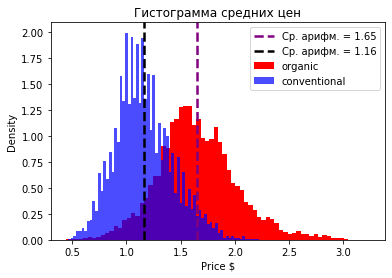

In [20]:
bins=70

fig, ax = plt.subplots()
ax.hist(org, bins = bins,color='red', alpha = 1,label='organic',density=True)
ax.hist(conv, bins = bins,color='blue', alpha = 0.7,label='conventional',density=True)
ax.set_ylabel('Density')
ax.set_xlabel("Price $")
ax.set_title("Гистограмма средних цен")
plt.axvline(np.mean(org),color='purple', linestyle='dashed', linewidth=2.5,label=('Ср. арифм. = '+str(round(np.mean(org), 2))))
plt.axvline(np.mean(conv),color='black', linestyle='dashed', linewidth=2.5,label=('Ср. арифм. = '+str(round(np.mean(conv), 2))))
plt.legend()
plt.show()


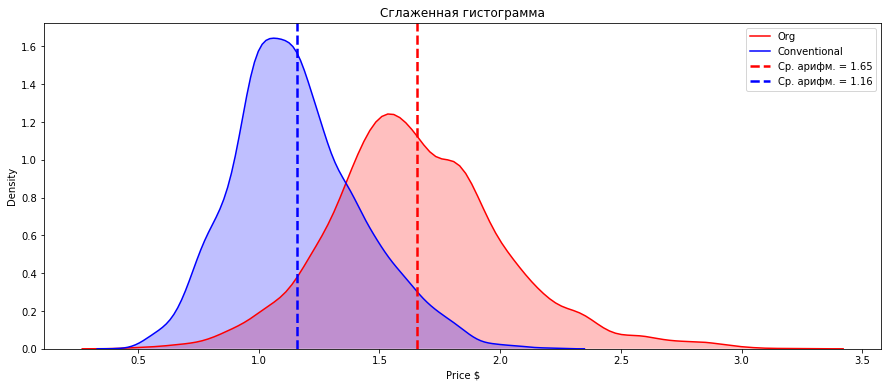

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
snsplot = sns.kdeplot(org, shade=True,label='Org',ax=ax,color='red')
snsplot = sns.kdeplot(conv, shade=True,label='Conventional',ax=ax,color='blue')
ax.set_ylabel('Density')
ax.set_xlabel("Price $")
ax.set_title("Сглаженная гистограмма")
plt.axvline(np.mean(org),color='red', linestyle='dashed', linewidth=2.5,label=('Ср. арифм. = '+str(round(np.mean(org), 2))))
plt.axvline(np.mean(conv),color='blue', linestyle='dashed', linewidth=2.5,label=('Ср. арифм. = '+str(round(np.mean(conv), 2))))
plt.legend()
plt.show()


Полезно посмотреть на эту гистограмму для всех лет по отдельности

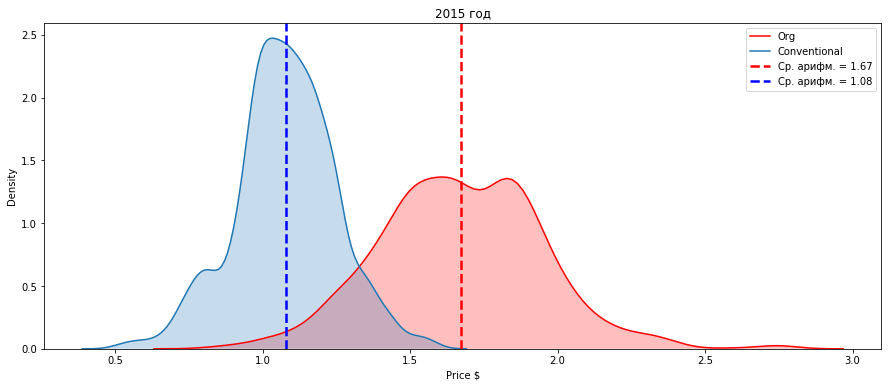

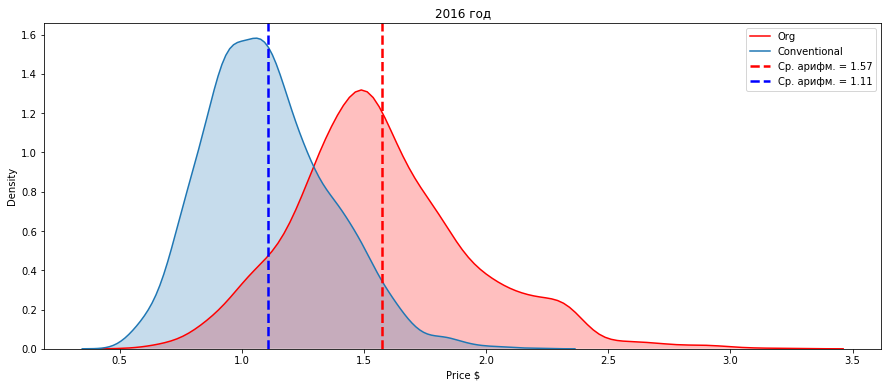

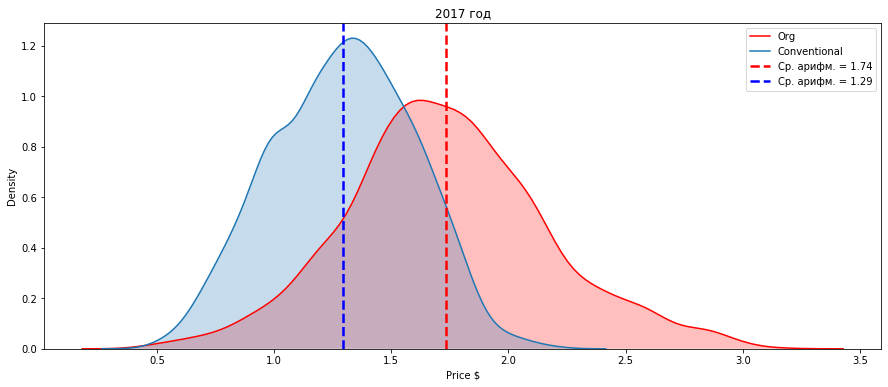

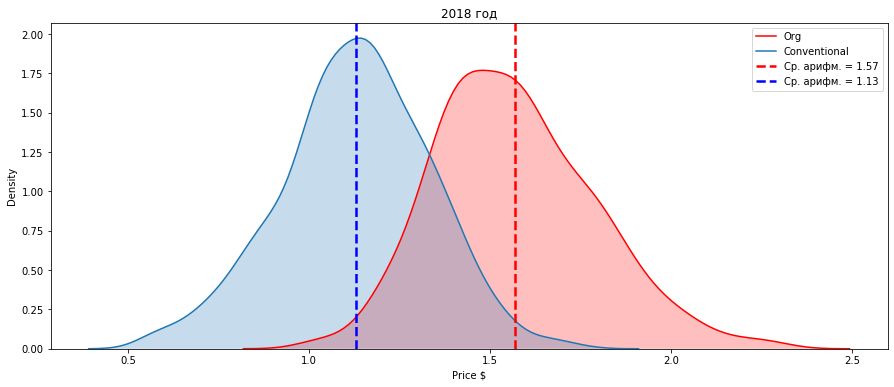

In [22]:
for year in year_count:
    org=df[(df.type=='organic')&(df.year==year)].AveragePrice
    conv=df[(df.type!='organic')&(df.year==year)].AveragePrice
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 6)
    snsplot = sns.kdeplot(org, shade=True,label='Org',ax=ax,color='red')
    snsplot = sns.kdeplot(conv, shade=True,label='Conventional',ax=ax)
    ax.set_ylabel('Density')
    ax.set_xlabel("Price $")
    ax.set_title(str(year)+' год')
    plt.axvline(np.mean(org),color='red', linestyle='dashed', linewidth=2.5,label=('Ср. арифм. = '+str(round(np.mean(org), 2))))
    plt.axvline(np.mean(conv),color='blue', linestyle='dashed', linewidth=2.5,label=('Ср. арифм. = '+str(round(np.mean(conv), 2))))
    plt.legend()
    plt.show()


Из гистограмм можно заметить несколько вещей:<br>
1)Каждый год распределения довольно сильно меняются<br>
2)Разброс цен у органики значительно больше, чем у не органики<br>
3)Средняя цена у органики выше

Также выведу среднюю цену в виде временного ряда

In [23]:
org=df[df.type=='organic'].loc[:,['Date','AveragePrice']].groupby(by='Date').mean()

conv=df[df.type!='organic'].loc[:,['Date','AveragePrice']].groupby(by='Date').mean()

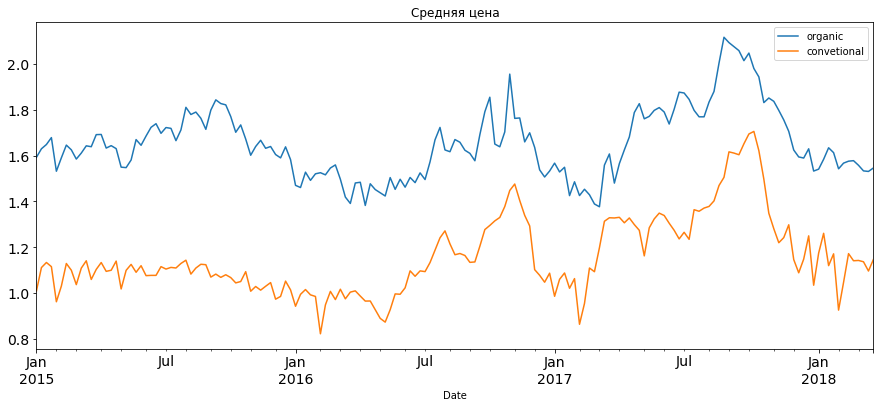

In [24]:
org.AveragePrice.plot(label='organic')
conv.AveragePrice.plot( figsize=(15,6),title= 'Средняя цена', fontsize=14,label='convetional')
plt.legend()

Видно, что в период 2015-2016 графики ведут себя совсем не похоже не следующие года(значит этот период явно нужно выбросить). С 2016 явно заметна сезонность(длинною  в год) и то, что графики становятся очень похожими. Кажется наблюдается растущий с 2016 года тренд, но чтобы это точно понять нужны дальнейшие исследования(я их проведу далее, когда буду предсказывать временной ряд)

**Можно отметить важное для нашей задачи заключение - графики стремятся быть похожими друг  на друга, это означает, что если в каком-то году выборки сильно отличаются, то в следующем году выборки будут более похожими друг на друга и менее похожими на прошлый год. Это означает, что нужно брать выборки, когда они уже похожи друг на друга. Поэтому я буду брать данные начиная с 2017 года**

***Проверка статистических гипотез***

Разбиваю выборку по регионам, при этом беру данные с 2017 года. Заодно проверяю на нормальность

In [25]:
d=dict()
norm=dict()
for reg in df.region.unique():
    da=df[(df.region==reg)&(df.year>=2017)]
    d[reg]=da
    norm[reg]=stats.shapiro(da.AveragePrice)[1]

In [26]:
l=list(norm.items())
l.sort(key=lambda x:x[1])

Вывожу самое ненормальное распределине

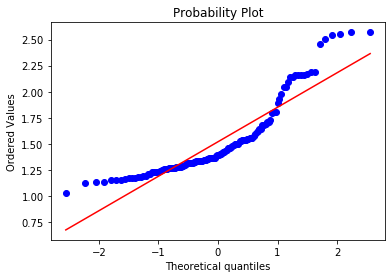

p-value = 1.266942800670634e-10


In [27]:
stats.probplot(d[l[0][0]].AveragePrice, dist = "norm", plot = plt)
plt.show()
print('p-value =',l[0][1])

Вывожу самое нормальное распределине

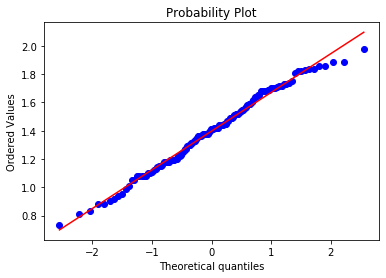

p-value = 0.302783340215683


In [28]:
stats.probplot(d[l[-1][0]].AveragePrice, dist = "norm", plot = plt)
plt.show()
print('p-value =',l[-1][1])

In [29]:
for key,value in norm.items():
    norm[key]=value>0.05

Есть как нормально распределённые выборки, так и ненормально распределённые выборки, поэтому нельзя использовать только лишь параметрические критерии

Я хочу определить выборки с наименьшим средним цен. Для этого я буду рассматривать выборки как связные, пробегу по всем выборкам, применю параметрический или непараметрический критерий(в зависимости от нормальности) для двусвязных выборок, чтобы определить одинаковая ли у них средняя цена. Довольно сложно объяснить алгоритм, поэтому прошу смотреть код

In [30]:
best=[]
for j,cur_region in enumerate(d):
    new_best=[]
    cur_mean=d[cur_region].AveragePrice.mean()
    Keep=True
    for best_region in best:
        eq=False
        if norm[cur_region] and norm[best_region]:
            if stats.ttest_rel(d[cur_region].AveragePrice, d[best_region].AveragePrice)[1]>0.05:# Параметрический критерий 
                eq=True                                                                    # Стьюдента для связных выборок
        else:
            if stats.wilcoxon(d[cur_region].AveragePrice, d[best_region].AveragePrice)[1]>0.05:# Непараметрический критерий 
                eq=True                                                                    # Вилкоксона для связных выборок
        
        if eq:
            new_best.append(best_region)
        else:
            if cur_mean>=d[best_region].AveragePrice.mean():
                new_best.append(best_region)
                Keep=False
    if Keep:
        new_best.append(cur_region)
    best=new_best
    print(best)

['Albany']
['Atlanta']
['Atlanta']
['Atlanta']
['Atlanta']
['Atlanta']
['Atlanta']
['Atlanta']
['Atlanta']
['CincinnatiDayton']
['CincinnatiDayton', 'Columbus']
['DallasFtWorth']
['DallasFtWorth']
['DallasFtWorth']
['DallasFtWorth']
['DallasFtWorth']
['DallasFtWorth']
['DallasFtWorth']
['Houston']
['Houston']
['Houston']
['Houston']
['Houston']
['Houston']
['Houston']
['Houston']
['Houston']
['Houston']
['Houston']
['Houston']
['Houston']
['Houston']
['Houston']
['Houston']
['Houston']
['Houston']
['Houston']
['Houston']
['Houston']
['Houston']
['Houston']
['Houston']
['Houston']
['Houston']
['Houston']
['Houston']
['Houston']
['Houston']
['Houston']
['Houston']
['Houston']
['Houston']
['Houston']
['Houston']


Я определил лучшие цены и на органику и на не органику, теперь сделаю тоже самое только отдельно для органики и не органики

In [31]:
d_org={}
d_conv={}
for i in d:
    d_org[i]=d[i][d[i].type=='organic']
    d_conv[i]=d[i][d[i].type!='organic']

In [32]:
best_org=[]
for cur_region in d_org:
    new_best=[]
    cur_mean=d_org[cur_region].AveragePrice.mean()
    Keep=True
    for best_region in best_org:
        eq=False
        if norm[cur_region] and norm[best_region]:
            if stats.ttest_rel(d_org[cur_region].AveragePrice, d_org[best_region].AveragePrice)[1]>0.05:
                   eq=True                                                         # Параметрический критерий 
                                                                                   # Стьюдента для связных выборок
        else:
            if stats.wilcoxon(d_org[cur_region].AveragePrice, d_org[best_region].AveragePrice)[1]>0.05:
                eq=True                                                            # Непараметрический критерий 
                                                                                   # Вилкоксона для связных выборок
        
        if eq:
            new_best.append(best_region)
        else:
            if cur_mean>=d_org[best_region].AveragePrice.mean():
                new_best.append(best_region)
                Keep=False
    if Keep:
        new_best.append(cur_region)
    best_org=new_best
    print(best_org)

['Albany']
['Albany', 'Atlanta']
['Albany', 'Atlanta']
['Albany', 'Atlanta']
['Albany', 'Atlanta']
['Albany', 'Atlanta', 'BuffaloRochester']
['Albany', 'Atlanta', 'BuffaloRochester']
['Albany', 'Atlanta', 'BuffaloRochester']
['Albany', 'Atlanta', 'BuffaloRochester']
['Albany', 'BuffaloRochester', 'CincinnatiDayton']
['BuffaloRochester', 'Columbus']
['Columbus', 'DallasFtWorth']
['Columbus', 'DallasFtWorth']
['DallasFtWorth', 'Detroit']
['DallasFtWorth', 'Detroit']
['DallasFtWorth', 'Detroit']
['DallasFtWorth', 'Detroit']
['DallasFtWorth', 'Detroit']
['Detroit', 'Houston']
['Detroit', 'Houston', 'Indianapolis']
['Detroit', 'Houston', 'Indianapolis']
['Detroit', 'Houston', 'Indianapolis']
['Detroit', 'Houston', 'Indianapolis']
['Detroit', 'Houston', 'Indianapolis']
['Detroit', 'Houston', 'Indianapolis']
['Detroit', 'Houston', 'Indianapolis']
['Detroit', 'Houston', 'Indianapolis']
['Detroit', 'Houston', 'Indianapolis']
['Detroit', 'Houston', 'Indianapolis']
['Detroit', 'Houston', 'Indiana

In [33]:
best_conv=[]
for cur_region in d_conv:
    new_best=[]
    cur_mean=d_conv[cur_region].AveragePrice.mean()
    Keep=True
    for best_region in best_conv:
        eq=False
        if norm[cur_region] and norm[best_region]:
            if stats.ttest_rel(d_conv[cur_region].AveragePrice, d_conv[best_region].AveragePrice)[1]>0.05:
                   eq=True                                                         # Параметрический критерий 
                                                                                    # Стьюдента для связных выборок
        else:
            if stats.wilcoxon(d_conv[cur_region].AveragePrice, d_conv[best_region].AveragePrice)[1]>0.05:# Непараметрический критерий 
                eq=True                                                                    # Вилкоксона для связных выборок
        
        if eq:
            new_best.append(best_region)
        else:
            if cur_mean>=d_conv[best_region].AveragePrice.mean():
                new_best.append(best_region)
                Keep=False
    if Keep:
        new_best.append(cur_region)
    best_conv=new_best
    print(best_conv)

['Albany']
['Atlanta']
['Atlanta']
['Atlanta']
['Atlanta']
['Atlanta']
['Atlanta']
['Atlanta']
['Atlanta']
['CincinnatiDayton']
['CincinnatiDayton', 'Columbus']
['DallasFtWorth']
['DallasFtWorth']
['DallasFtWorth']
['DallasFtWorth']
['DallasFtWorth']
['DallasFtWorth']
['DallasFtWorth']
['Houston']
['Houston']
['Houston']
['Houston']
['Houston']
['Houston']
['Houston']
['Houston']
['Houston']
['Houston']
['Houston']
['Houston']
['Houston']
['Houston']
['Houston']
['PhoenixTucson']
['PhoenixTucson']
['PhoenixTucson']
['PhoenixTucson']
['PhoenixTucson']
['PhoenixTucson']
['PhoenixTucson']
['PhoenixTucson']
['PhoenixTucson']
['PhoenixTucson']
['PhoenixTucson']
['PhoenixTucson']
['PhoenixTucson']
['PhoenixTucson']
['PhoenixTucson']
['PhoenixTucson']
['PhoenixTucson']
['PhoenixTucson']
['PhoenixTucson']
['PhoenixTucson']
['PhoenixTucson']


In [34]:
print('Лучшие города, если вам нравится как органика так и не органика:', ', '.join(best))
print('Лучшие города, если вам нравится больше органика:', ', '.join(best_org))
print('Лучшие города, если вам нравится больше не органика:', ', '.join(best_conv))

Лучшие города, если вам нравится как органика так и не органика: Houston
Лучшие города, если вам нравится больше органика: Detroit, Houston, Indianapolis
Лучшие города, если вам нравится больше не органика: PhoenixTucson


Далее будут графики подтверждающие этого

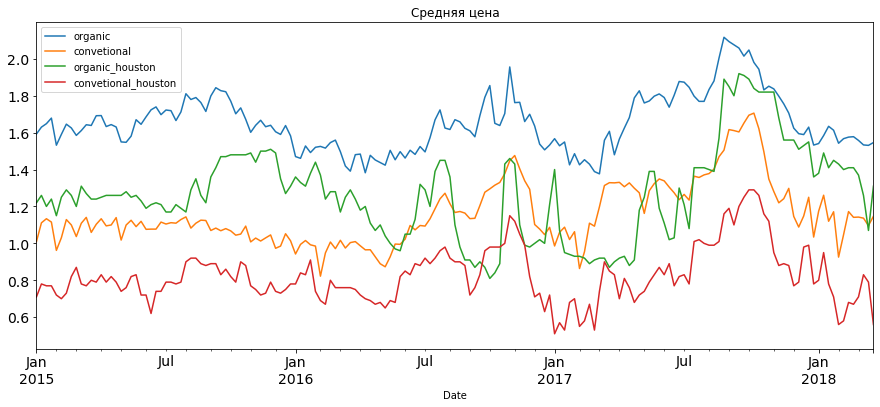

In [35]:
org=df[df.type=='organic'].loc[:,['Date','AveragePrice']].groupby(by='Date').mean()
conv=df[df.type!='organic'].loc[:,['Date','AveragePrice']].groupby(by='Date').mean()

org.AveragePrice.plot(label='organic')
conv.AveragePrice.plot( figsize=(15,6),title= 'Средняя цена', fontsize=14,label='convetional')

org=df[(df.type=='organic')&(df.region=='Houston')].loc[:,['Date','AveragePrice']].groupby(by='Date').mean()
conv=df[(df.type!='organic')&(df.region=='Houston')].loc[:,['Date','AveragePrice']].groupby(by='Date').mean()

org.AveragePrice.plot(label='organic_houston')
conv.AveragePrice.plot( figsize=(15,6),title= 'Средняя цена', fontsize=14,label='convetional_houston')

plt.legend()

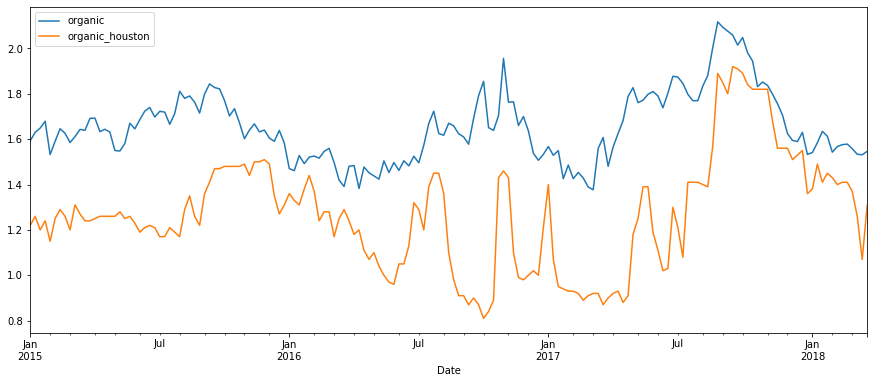

In [36]:
org=df[df.type=='organic'].loc[:,['Date','AveragePrice']].groupby(by='Date').mean()
org.AveragePrice.plot(label='organic')


org=df[(df.type=='organic')&(df.region=='Houston')].loc[:,['Date','AveragePrice']].groupby(by='Date').mean()
org.AveragePrice.plot(label='organic_houston',figsize=(15,6))


plt.legend()

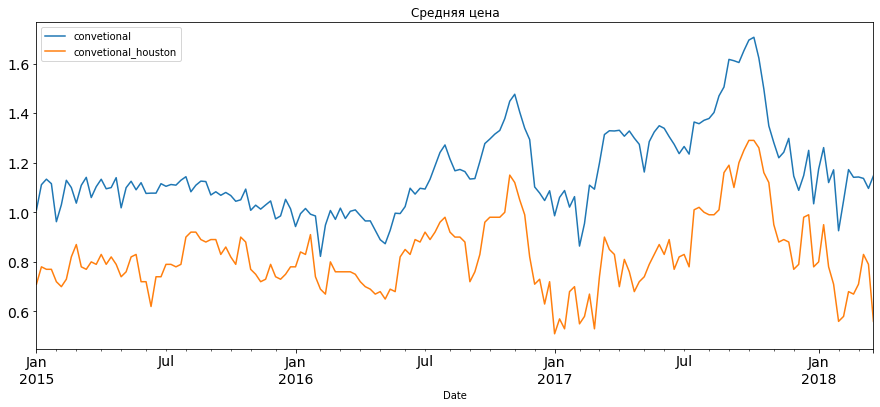

In [37]:
conv=df[(df.type!='organic')].loc[:,['Date','AveragePrice']].groupby(by='Date').mean()
conv.AveragePrice.plot( figsize=(15,6),title= 'Средняя цена', fontsize=14,label='convetional')


conv=df[(df.type!='organic')&(df.region=='Houston')].loc[:,['Date','AveragePrice']].groupby(by='Date').mean()
conv.AveragePrice.plot( figsize=(15,6),title= 'Средняя цена', fontsize=14,label='convetional_houston')

plt.legend()

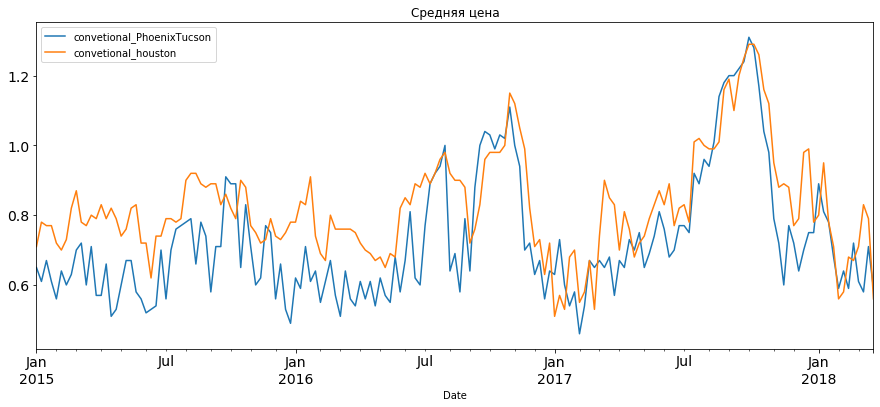

In [38]:
conv=df[(df.type!='organic')&(df.region=='PhoenixTucson')].loc[:,['Date','AveragePrice']].groupby(by='Date').mean()
conv.AveragePrice.plot( figsize=(15,6),title= 'Средняя цена', fontsize=14,label='convetional_PhoenixTucson')


conv=df[(df.type!='organic')&(df.region=='Houston')].loc[:,['Date','AveragePrice']].groupby(by='Date').mean()
conv.AveragePrice.plot( figsize=(15,6),title= 'Средняя цена', fontsize=14,label='convetional_houston')

plt.legend()

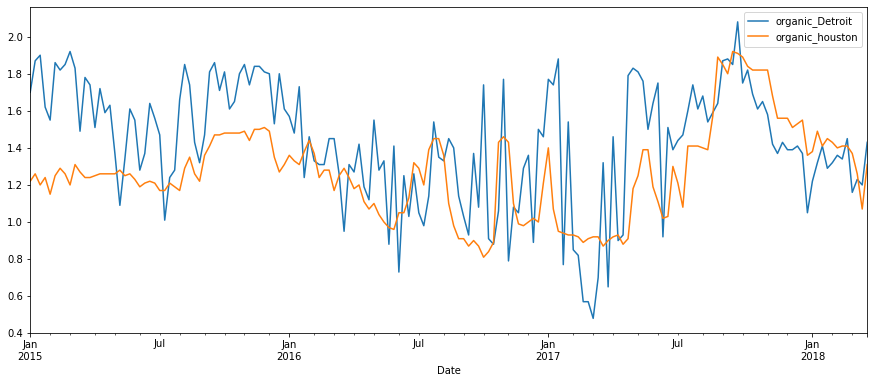

In [39]:
org=df[(df.type=='organic')&(df.region=='Detroit')].loc[:,['Date','AveragePrice']].groupby(by='Date').mean()
org.AveragePrice.plot(label='organic_Detroit')


org=df[(df.type=='organic')&(df.region=='Houston')].loc[:,['Date','AveragePrice']].groupby(by='Date').mean()
org.AveragePrice.plot(label='organic_houston',figsize=(15,6))


plt.legend()

На последнем графике кажется, что Detroit значительно хуже Хьюстона, но стоит вспомнить, что я всё рассчитывал по данным с 2017 года

In [40]:
df[(df.year>=2017)&(df.type=='organic')].groupby(by='region').mean().sort_values(by='AveragePrice').head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
region,,,,,,,,,,
Houston,1.338615,33129.245385,9143.902769,110.646923,0.030615,23874.665077,22948.042769,926.622308,0.0,2017.184615
SouthCentral,1.380000,135718.408000,31249.529231,5700.062615,1.285538,98767.530615,90775.863385,7991.667231,0.0,2017.184615
Indianapolis,1.403077,7920.855077,184.042000,1461.231385,0.000000,6243.688923,3362.756154,2880.932769,0.0,2017.184615
Detroit,1.407692,20802.937538,629.520923,4442.986308,0.043538,15696.196615,8185.215538,7510.981077,0.0,2017.184615
DallasFtWorth,1.413231,24631.210769,6652.345846,947.396769,0.000000,17031.468154,16542.355538,489.112615,0.0,2017.184615


Видно, что это было не зря, так как SouthCentral не попал, несмотря на AverigePrice ниже, чем у Indianapolis

***Построение предсказание временного ряда***

Построю предсказание для города с лучшей ценой на органику - Houston

In [41]:
dh=df[(df.type=='organic')&(df.region=='Houston')].groupby(by='Date').mean()

Сезонность равна одному году. Выделю 2018 год для проверки точности

In [42]:
season=len(dh[dh.year==2016])
dtest=dh[dh.year==2018].AveragePrice
dtrain=dh[dh.year<2018].AveragePrice

print(season)

52


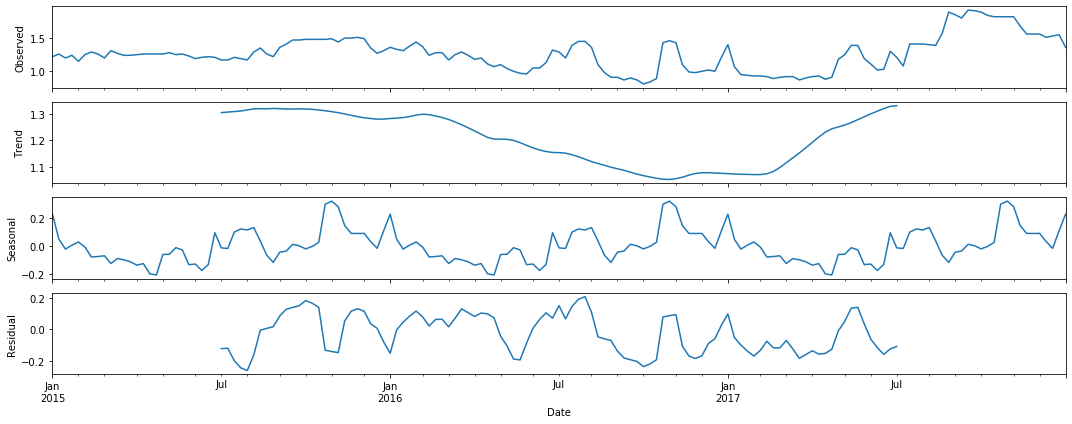

In [43]:
with plt.rc_context():
    plt.rc("figure", figsize=(15,6))
    result = sm.tsa.seasonal_decompose(dtrain, model="additive",freq=52)
    result.plot()
    plt.show()

Буду использовать модель SARIMA для предсказания.

In [44]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 24, cutoff = 0.05):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.values,autolag='AIC' )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

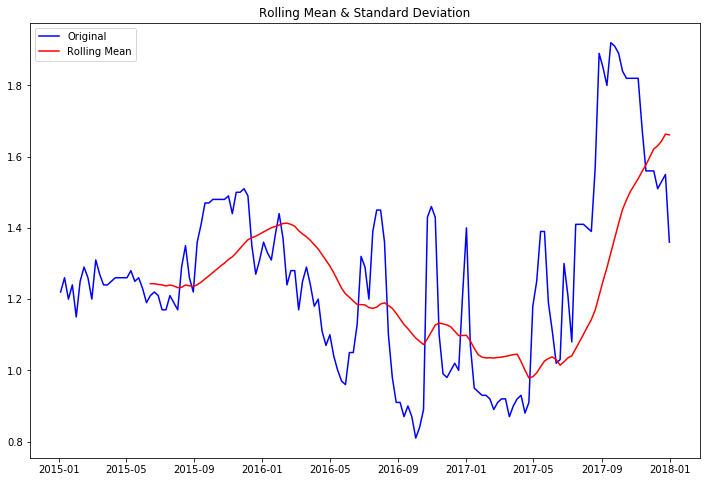

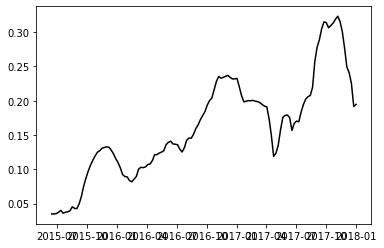

Results of Dickey-Fuller Test:
p-value = 0.1143. The series is likely non-stationary.
Test Statistic                  -2.504694
p-value                          0.114336
#Lags Used                       2.000000
Number of Observations Used    154.000000
Critical Value (1%)             -3.473543
Critical Value (5%)             -2.880498
Critical Value (10%)            -2.576878
dtype: float64


In [45]:
test_stationarity(dtrain)

Продифференциируем, чтобы ряд стал стационарным

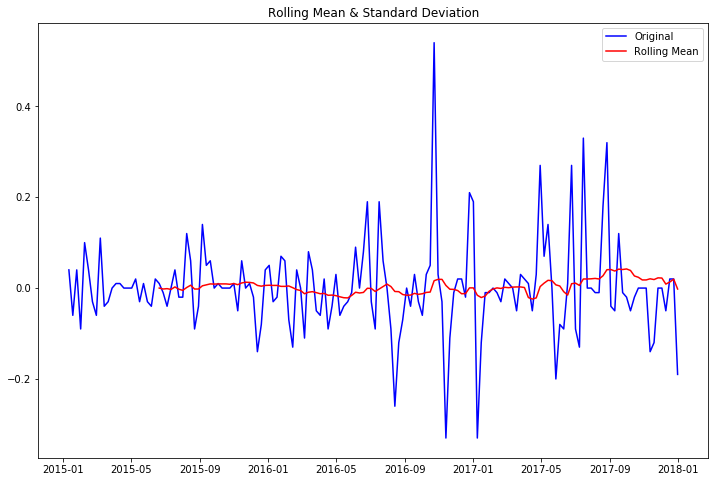

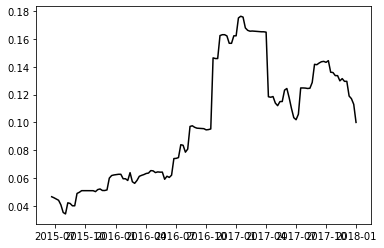

Results of Dickey-Fuller Test:
p-value = 0.0000. The series is likely stationary.
Test Statistic                -9.751318e+00
p-value                        8.001707e-17
#Lags Used                     1.000000e+00
Number of Observations Used    1.540000e+02
Critical Value (1%)           -3.473543e+00
Critical Value (5%)           -2.880498e+00
Critical Value (10%)          -2.576878e+00
dtype: float64


In [46]:
d_diff = dtrain - dtrain.shift(1)
d_diff.dropna(inplace = True)
test_stationarity(d_diff)

Получилось. Таким образом d=1, D=0. Остальные параметры переберём. 

In [47]:
d=1
D=0

ps = range(0, 2)

qs = range(0, 2)
Ps = range(0, 2)

Qs = range(0, 2)

s=[3,4,12]

In [48]:
from itertools import product

parameters = product(ps, qs, Ps, Qs,s)
parameters_list = list(parameters)
len(parameters_list)

48

In [49]:
import warnings
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')

for param in parameters_list:
    #try except нужен, потому что на некоторых наборах параметров модель не обучается
    try:
        model=sm.tsa.statespace.SARIMAX(dtrain, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], param[4])).fit(disp=-1)
    #выводим параметры, на которых модель не обучается и переходим к следующему набору
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    #сохраняем лучшую модель, aic, параметры
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
warnings.filterwarnings('default')

In [50]:
print(best_model.summary().tables[0])
print(best_model.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                       AveragePrice   No. Observations:                  157
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 141.012
Date:                            Wed, 04 Dec 2019   AIC                           -272.025
Time:                                    06:38:00   BIC                           -256.775
Sample:                                01-04-2015   HQIC                          -265.831
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3921      0.267     -1.471      0.141      -0.915       0.130
ma.L1          0.5782      0.250   

In [51]:
forecast = best_model.predict(start = dtrain.shape[0]-52, end = dtrain.shape[0]+51)

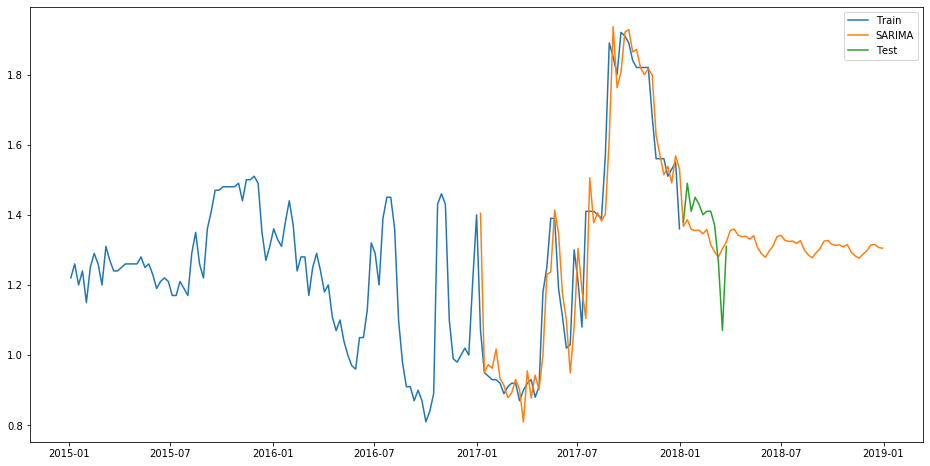

In [52]:
plt.figure(figsize=(16,8))
plt.plot(dtrain, label='Train')
plt.plot(forecast, label='SARIMA')
plt.plot(dtest, label='Test')
plt.legend(loc='best')
plt.show()

Результат получился совершенно ужасным, возможно ему не хватило данных для обучения и он переобучился. Тогда добавим ему побольше фичей. Будем использовать линейную модель.

In [53]:
sample_data_df=dh.iloc[:,0:1]

In [54]:
# лаговые фичи
lag_period = 4 #Лаг = одному месяцу
features = []
for period_mult in range(1,12,1):
    sample_data_df["lag_period_{}".format(period_mult)] = sample_data_df.AveragePrice.shift(period_mult*lag_period)
    features.append("lag_period_{}".format(period_mult))

# лаговые статистики
sample_data_df['lagf_min'] = sample_data_df[features].min(axis = 1)
sample_data_df['lagf_max'] = sample_data_df[features].max(axis = 1)
sample_data_df['lagf_mean'] = sample_data_df[features].mean(axis = 1)
sample_data_df['lagf_median'] = sample_data_df[features].median(axis = 1)    

features.extend(['lagf_min', 'lagf_max', 'lagf_mean', 'lagf_median'])

In [59]:
from sklearn.linear_model import LinearRegression
train = sample_data_df.iloc[:-24].dropna()
test = sample_data_df.iloc[-24:]

model = LinearRegression()
model.fit(train[features],train['AveragePrice'] )
forecast = model.predict(test[features])

In [60]:
pred=pd.Series(forecast,test.index)

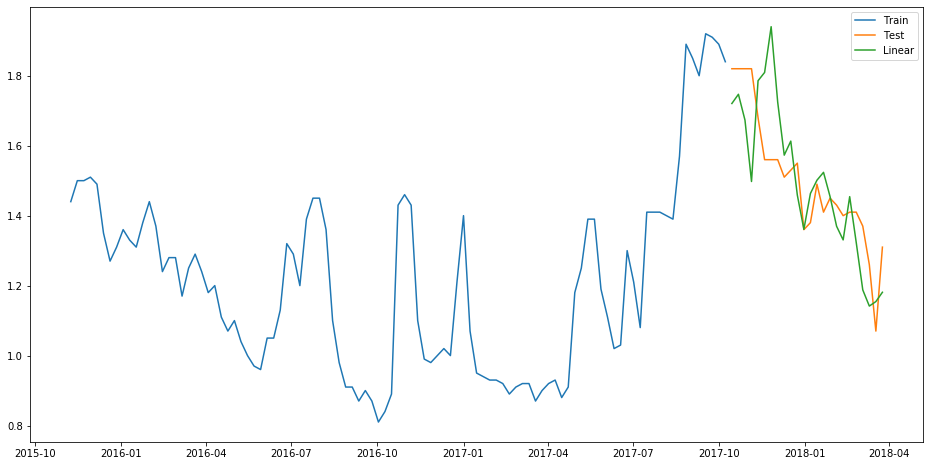

In [61]:
plt.figure(figsize=(16,8))
plt.plot(train.AveragePrice, label='Train')
plt.plot(test.AveragePrice, label='Test')
plt.plot(pred, label='Linear')

plt.legend(loc='best')
plt.show()

Уже лучше

***Вывод***

Благодаря данному исследованию я смог выяснить где с 2017 года лучшие цены на органические и не органические авокадо. Если предположить, что разница цен в 2019 году будет такой-же как в 2017 и начале 2018, то благодаря этим знаниям я могу выбрать лучший регион для покупки авокадо в 2019 году

In [62]:
print('Лучшие города, если вам нравится как органика так и не органика:', ', '.join(best))
print('Лучшие города, если вам нравится больше органика:', ', '.join(best_org))
print('Лучшие города, если вам нравится больше не органика:', ', '.join(best_conv))

Лучшие города, если вам нравится как органика так и не органика: Houston
Лучшие города, если вам нравится больше органика: Detroit, Houston, Indianapolis
Лучшие города, если вам нравится больше не органика: PhoenixTucson


Также я построил 2 предсказывающие модели по временному ряду. Sarima ведёт себе ужасно, она просто запомнила датасет(возможно я сделал что-то не так), LinearRegression предсказывает достаточно хорошо.